### Gráficos

In [1]:
# Instala a versão exata do pacote matplotlib
!pip install -q -U matplotlib==3.2.1

In [2]:
import matplotlib as mat
mat.__version__

'3.2.1'

In [3]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
     
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(now, 'Teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var(produto_novo):
    new_date = datetime.datetime.now()
    new_prod_name = produto_novo
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor > 80.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

# Gerar gráfico com os dados no banco de dados
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


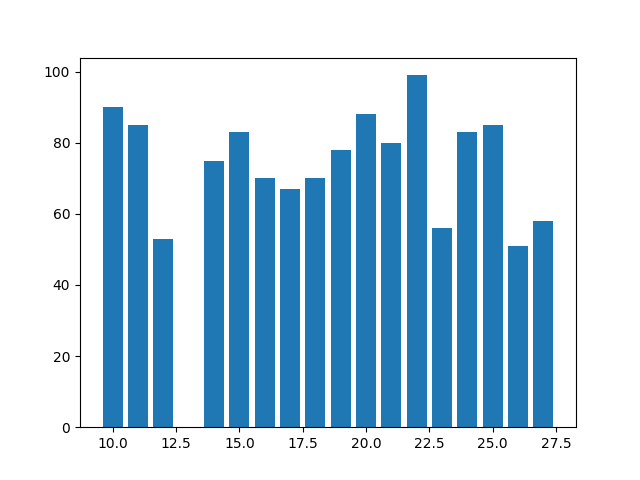

In [4]:
# Gerando gráficos
dados_grafico()

In [5]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2021-11-04 13:21:58.192875', 'Monitor', 85.0)
(12, '2021-11-04 13:21:59.210286', 'Monitor', 53.0)
(14, '2021-11-04 13:22:01.246068', 'Monitor', 75.0)
(15, '2021-11-04 13:22:02.263066', 'Monitor', 83.0)
(16, '2021-11-04 13:22:03.268659', 'Monitor', 70.0)
(17, '2021-11-04 13:22:04.285640', 'Monitor', 67.0)
(18, '2021-11-04 13:22:05.302261', 'Monitor', 70.0)
(19, '2021-11-04 13:22:06.318874', 'Monitor', 78.0)
(20, '2021-11-04 13:22:07.335340', 'Monitor', 88.0)
(21, '2021-11-09 16:12:44.327842', 'suporte de monitor', 80.0)
(22, '2021-11-09 16:12:46.399463', 'suporte de monitor', 99.0)
(23, '2021-11-09 16:13:43.897791', 'mouse', 56.0)
(24, '2021-11-09 16:16:24.276106', 'Mouse', 83.0)
(25, '2021-11-09 16:16:24.322059', 'Teclado mecânico', 85.0)
(26, '2021-11-09 16:16:24.327528', 'head-set', 51.0)
(27, '2021-11-09 16:16:24.331861', 'mouse-pad', 58.0)


In [6]:
data_insert_var('suporte de monitor')

In [7]:
data_insert_var('mouse')

In [8]:
skus = ['Mouse', 'Teclado mecânico', 'head-set', 'mouse-pad']
for i in skus:
    data_insert_var(i)